<a href="https://colab.research.google.com/github/sultanbst123/MachineHack_CarPrice/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data modelling with Python

## Library & File

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 23.1 MB 80.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install catboost
!pip install optuna
!pip install borutashap

     |████████████████████████████████| 76.4 MB 22 kB/s 
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 45.7 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 111 kB 60.2 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 144 kB 50.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=9578992d2cca9f8f13d683f3cbebd7598ec0463d37dd037ae1f7ab4b2f34c116
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 371 kB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay


import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Car price/train_Carprice(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Car price/test_Carprice(clean).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18664 entries, 0 to 18663
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18664 non-null  int64  
 1   Price             18664 non-null  int64  
 2   Levy              18664 non-null  int64  
 3   Category          18664 non-null  object 
 4   Leather interior  18664 non-null  object 
 5   Fuel type         18664 non-null  object 
 6   Engine volume     18664 non-null  float64
 7   Cylinders         18664 non-null  int64  
 8   Gear box type     18664 non-null  object 
 9   Drive wheels      18664 non-null  object 
 10  Doors             18664 non-null  object 
 11  Wheel             18664 non-null  object 
 12  Color             18664 non-null  object 
 13  Airbags           18664 non-null  int64  
 14  has_turbo         18664 non-null  object 
 15  new_prod_year     18664 non-null  object 
 16  age_car           18664 non-null  object

In [ ]:
train.head()

,ID,Price,Levy,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo,new_prod_year,age_car,bin_mileage
0,3,13328,1399,Jeep,Yes,Hybrid,3.5,6,Automatic,4x4,04-May,Left wheel,Silver,12,no,>2000,[0-25],8
1,7,16621,1018,Jeep,No,Petrol,3.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8,no,>2000,[0-25],8
2,9,8467,0,Hatchback,No,Petrol,1.3,4,Variator,Front,04-May,Right-hand drive,Black,2,no,>2000,[0-25],8
3,5,3607,862,Jeep,Yes,Hybrid,2.5,4,Automatic,4x4,04-May,Left wheel,White,0,no,>2000,[0-25],7
4,3,11726,446,Hatchback,Yes,Petrol,1.3,4,Automatic,Front,04-May,Left wheel,Silver,4,no,>2000,[0-25],4


## Split train & validation

In [ ]:
# ambil columns category

cater = train.select_dtypes(exclude="number").columns

In [ ]:
train[cater] = train[cater].astype("category")

In [ ]:
tester = test

x = train.drop("Price", axis=1)
y = np.log(train.Price) # normalkan target

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x, y,test_size=0.2,random_state=2012)

## Feature Selection with LGBM & test

In [ ]:
# test dengan lgbm 

LGBM = LGBMRegressor(random_state=29)
LGBM.fit(x_train, y_train)

LGBMRegressor(random_state=29)

In [ ]:
# function for rmsle, rmse & mae 

def rmsle(y_true, y_pred): 
    rmsle = mean_squared_log_error(np.exp(y_true), np.exp(y_pred), squared=False)
    return rmsle

def rmse(y_true, y_pred):
    rmse = mean_squared_error(np.exp(y_true), np.exp(y_pred), squared=False)
    return rmse

def mae(y_true, y_pred):
    mae = mean_absolute_error(np.exp(y_true), np.exp(y_pred))
    return mae

In [ ]:
pred = LGBM.predict(x_val)

In [ ]:
print(f"rmsle: {rmsle(pred,y_val)}")
print(f"mae: {mae(pred,y_val)}")
print(f"rmse: {rmse(pred,y_val)}")

rmsle: 1.047484086745919
mae: 7283.7109872306855
rmse: 14033.253425277675


In [ ]:
# Feature selection with borutshap + LGBM 

FS = BorutaShap(model = LGBM, 
                importance_measure="shap", 
                classification=False)

In [ ]:
# fit 
FS.fit(X=x_train, y=y_train, n_trials=10, random_state=0)

  0%|          | 0/10 [00:00<?, ?it/s]

11 attributes confirmed important: ['bin_mileage', 'has_turbo', 'Wheel', 'Leather interior', 'Category', 'Engine volume', 'Gear box type', 'Airbags', 'Fuel type', 'Levy', 'Color']
4 attributes confirmed unimportant: ['Doors', 'ID', 'Drive wheels', 'age_car']
2 tentative attributes remains: ['new_prod_year', 'Cylinders']


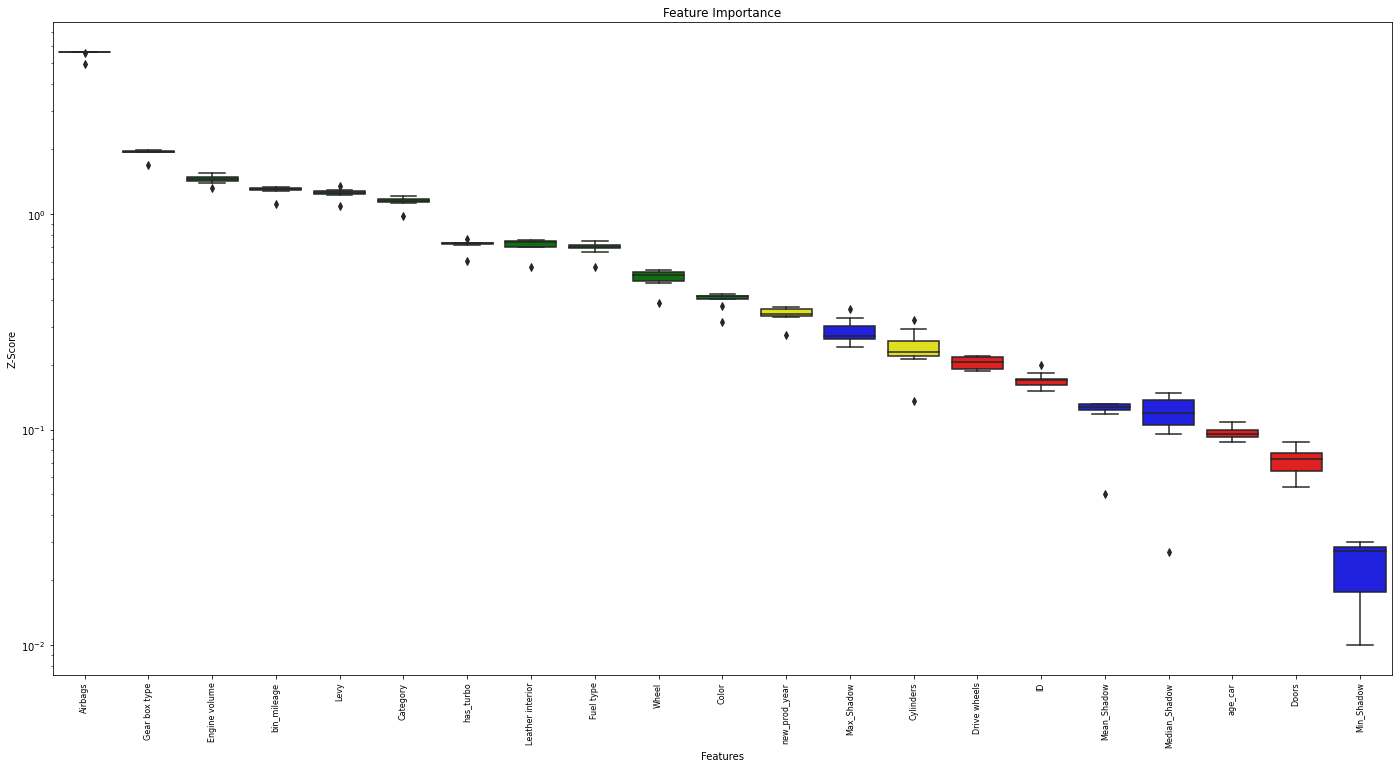

In [ ]:
FS.plot(which_features='all', figsize=(24,12))

In [ ]:
col = FS.Subset().columns.to_list()
col

['bin_mileage',
 'has_turbo',
 'Wheel',
 'Leather interior',
 'Category',
 'Engine volume',
 'Gear box type',
 'Airbags',
 'Fuel type',
 'Levy',
 'Color']

In [ ]:
# latih lagi untuk melihat perbedaan 

LGBM.fit(x_train[col], y_train)

LGBMRegressor(random_state=29)

In [ ]:
pred2 = LGBM.predict(x_val[col])

In [ ]:
print(f"rmsle: {rmsle(pred2,y_val)}")
print(f"mae: {mae(pred2,y_val)}")
print(f"rmse: {rmse(pred2,y_val)}")

rmsle: 1.0438105309636652
mae: 7185.847938737974
rmse: 13938.056578737636


In [ ]:
rmse_list = []
rmsle_list = []
mae_list = []

## MODEL - 1

In [ ]:
x_train_1 = x_train[col]
x_val_1 = x_val[col]

In [ ]:
# buat cater baru 
cater = x_train_1.select_dtypes(exclude="number").columns

In [ ]:
x_val_1.dtypes

bin_mileage            int64
has_turbo           category
Wheel               category
Leather interior    category
Category            category
Engine volume        float64
Gear box type       category
Airbags                int64
Fuel type           category
Levy                   int64
Color               category
dtype: object

In [ ]:
ft = {}
for i in cater:
    ft[i] = LabelEncoder()
    x_train_1[i] = ft[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = ft[i].transform(x_val_1[i])

In [ ]:
x_train_1.dtypes

bin_mileage           int64
has_turbo             int64
Wheel                 int64
Leather interior      int64
Category              int64
Engine volume       float64
Gear box type         int64
Airbags               int64
Fuel type             int64
Levy                  int64
Color                 int64
dtype: object

In [ ]:
XGB = XGBRegressor(random_state=10)
GBT = GradientBoostingRegressor(random_state=20)
HGBT = HistGradientBoostingRegressor(random_state=30)
ADA = AdaBoostRegressor(random_state=40)
EXT = ExtraTreeRegressor(random_state=50)
RF = RandomForestRegressor(random_state=60)
DT = DecisionTreeRegressor(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):

    #fit model
    model.fit(x_train,y_train)

    #predict
    pred = model.predict(x_val)

    #rmse, rmsle, mae 

    rmse_list.append(rmse(y_val, pred)) 
    rmsle_list.append(rmsle(y_val, pred)) 
    mae_list.append(mae(y_val, pred)) 
    
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBRegressor(random_state=10)
[11:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
->->->->->->->->->-> DONE
------------------------------
AdaBoostRegressor(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingRegressor(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingRegressor(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeRegressor(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestRegressor(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeRegressor(random_state=50)
->->->->->->->->->-> DONE


## MODEL - 2

In [ ]:
x_train_2 = x_train[col]
x_val_2 = x_val[col]

In [ ]:
x_train_2.dtypes

bin_mileage            int64
has_turbo           category
Wheel               category
Leather interior    category
Category            category
Engine volume        float64
Gear box type       category
Airbags                int64
Fuel type           category
Levy                   int64
Color               category
dtype: object

In [ ]:
CB = CatBoostRegressor(random_state=929)
LGBM = LGBMRegressor(random_state=299)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #predict
       pred = model.predict(x_val)

       #rmse, rmsle, mae 

       rmse_list.append(rmse(y_val, pred))
       rmsle_list.append(rmsle(y_val, pred))
       mae_list.append(mae(y_val, pred))
    
   #catboost
    else:         
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False) 

       #predict
       pred = model.predict(x_val)

       #rmse, rmsle, mae 

       rmse_list.append(rmse(y_val, pred))
       rmsle_list.append(rmsle(y_val, pred))
       mae_list.append(mae(y_val, pred))
    

    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMRegressor(random_state=299)
->->->->->->->->->-> DONE


## MODEL - 3

In [ ]:
x_train_3 = x_train.copy() 
x_val_3 = x_val.copy()

In [ ]:
x_train_3.head()

,ID,Levy,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo,new_prod_year,age_car,bin_mileage
11388,4,0,Hatchback,No,Petrol,1.4,4,Manual,Front,02-Mar,Left wheel,Black,2,no,<2000,[0-25],10
8666,0,697,Sedan,Yes,Petrol,1.8,4,Automatic,Front,04-May,Left wheel,Black,12,no,>2000,[0-25],5
4218,0,0,Hatchback,No,Petrol,1.3,4,Variator,Front,04-May,Right-hand drive,Silver,2,no,>2000,[0-25],1
3663,0,988,Hatchback,No,Hybrid,1.5,4,Automatic,Front,04-May,Left wheel,Silver,9,no,>2000,[0-25],7
6441,8,765,Sedan,Yes,Petrol,2.0,4,Automatic,Rear,04-May,Left wheel,White,12,no,>2000,[0-25],4


In [ ]:
# pisahkan numeric column

number = x_train_3.select_dtypes("number").columns

In [ ]:

# scaler values

sc = StandardScaler() 
x_train_3[number] = sc.fit_transform(x_train_3[number])
x_val_3[number] = sc.transform(x_val_3[number])

In [ ]:
# dummies category

x_train_3 = pd.get_dummies(x_train)
x_val_3 = pd.get_dummies(x_val_3)

In [ ]:
x_train_3.head()

,ID,Levy,Engine volume,Cylinders,Airbags,bin_mileage,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_No,Leather interior_Yes,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Others,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive,Color_Beige,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,has_turbo_no,has_turbo_yes,new_prod_year_<2000,new_prod_year_>2000,age_car_>50,age_car_[0-25],age_car_[25-50]
11388,4,0,1.4,4,2,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
8666,0,697,1.8,4,12,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4218,0,0,1.3,4,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
3663,0,988,1.5,4,9,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
6441,8,765,2.0,4,12,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [ ]:
LR = LinearRegression()
ELS = ElasticNet(random_state=9292)
RD = Ridge(random_state=102) #
LS = Lasso(random_state=15)
#SVM = SVR(kernel="linear")
#KNN = KNeighborsRegressor()
SGDSVM = SGDOneClassSVM(random_state=289)

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):

    #fit model
    model.fit(x_train,y_train)

    #predict
    pred = model.predict(x_val)

    #rmse, rmsle, mae 

    rmse_list.append(rmse(y_val, pred)) 
    rmsle_list.append(rmsle(y_val, pred)) 
    mae_list.append(mae(y_val, pred)) 
    
    
    return model

In [ ]:
for i in [LR,ELS,RD,LS,SGDSVM]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LinearRegression()
->->->->->->->->->-> DONE
------------------------------
ElasticNet(random_state=9292)
->->->->->->->->->-> DONE
------------------------------
Ridge(random_state=102)
->->->->->->->->->-> DONE
------------------------------
Lasso(random_state=15)
->->->->->->->->->-> DONE
------------------------------
SGDOneClassSVM(random_state=289)
->->->->->->->->->-> DONE


## Model-Selection

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM","LR","ELS","RD","LS","SGDSVM"], 
                          "RMSE": rmse_list, 
                          "RMSLE": rmsle_list,
                          "MAE": mae_list})
all_models = all_models.set_index("models")

In [ ]:
all_models

,RMSE,RMSLE,MAE
models,,,
XGB,15722.327129,1.149465,8435.682727
ADA,23385.696677,1.967292,15024.554515
GBT,15732.691287,1.151050,8449.709040
HGBT,13938.271342,1.033736,7199.273858
DT,14464.658416,1.346087,7138.076870
RF,12942.866189,0.992847,6017.396352
EXT,15410.122442,1.295310,7226.982969
CB,13868.684472,1.043366,7148.899320
LGBM,13938.056579,1.043811,7185.847939


##Hyperparameters-Tuning

In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(rmsle, greater_is_better=False, size=10)

In [ ]:
rf = RandomForestRegressor()
max_features = ["sqrt","log2","auto"]
n_estimators = [100,1000]

params = dict(max_features=max_features,n_estimators=n_estimators)

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1,scoring=rmsle)
result = grid_search.fit(x_train_1, y_train)

In [ ]:
print(f"best {result.best_params_}")

best {'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
rf_params = result.best_params_

In [ ]:
rf = RandomForestRegressor(**rf_params, random_state=17)

In [ ]:
rf.fit(x_train_1, y_train)

RandomForestRegressor(max_features='sqrt', random_state=17)

In [ ]:
true = rf.predict(x_val_1)

In [ ]:
rmsle(y_val, true)

0.9564102741003027

## Cross-validation with Kfold

In [ ]:
y_true = []

def cross_val(X, y, test, model, params, folds=7):

    err = []
    
    skf = KFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
 
        alg = model(**params)
        alg.fit(x_train, y_train)
 
        pred = alg.predict(x_test)
        error = rmsle(y_test, pred)
        err.append(error)
        
        # pred test 
        y_test = alg.predict(test) 
        y_true.append(np.exp(y_test)) 

        print(f" RMSLE: {error}")
        print("-"*50)
     
    print("\nmean:",np.array(err).mean())

    return alg

In [ ]:
x_new = pd.concat([x_train_1,x_val_1])

In [ ]:
x_new

,bin_mileage,has_turbo,Wheel,Leather interior,Category,Engine volume,Gear box type,Airbags,Fuel type,Levy,Color
11388,10,0,0,0,3,1.4,1,2,5,0,1
8666,5,0,0,1,9,1.8,0,12,5,697,1
4218,1,0,1,0,3,1.3,3,2,5,0,12
3663,7,0,0,0,3,1.5,0,9,2,988,12
6441,4,0,0,1,9,2.0,0,12,5,765,14
...,...,...,...,...,...,...,...,...,...,...,...
12181,8,0,0,0,4,2.5,2,8,5,779,12
4636,1,1,0,0,2,1.7,1,0,1,0,2
10187,4,0,0,1,9,2.5,0,0,5,779,14
1980,6,0,0,1,4,2.0,0,4,1,707,1


In [ ]:
y_new = pd.concat([y_train, y_val]) 
y_new

11388     7.693937
8666      8.313117
4218      3.688879
3663      9.115480
6441      8.610319
           ...    
12181    10.552160
4636      8.966994
10187     9.436998
1980     10.175612
16291     8.768574
Name: Price, Length: 18664, dtype: float64

In [ ]:
tester = tester[col]

In [ ]:

# scale test

for i in cater:
    tester[i] = ft[i].transform(tester[i])

In [ ]:
rf_score = cross_val(x_new, y_new, tester, RandomForestRegressor, rf_params)

Fold: 1
 RMSLE: 0.9955341952276634
--------------------------------------------------
Fold: 2
 RMSLE: 0.9800500405705779
--------------------------------------------------
Fold: 3
 RMSLE: 1.0130800101971562
--------------------------------------------------
Fold: 4
 RMSLE: 1.055822064654913
--------------------------------------------------
Fold: 5
 RMSLE: 0.9481159913940213
--------------------------------------------------
Fold: 6
 RMSLE: 1.073259018927402
--------------------------------------------------
Fold: 7
 RMSLE: 0.9523366230157585
--------------------------------------------------

mean: 1.0025997062839276


In [ ]:
pred = rf_score.predict(x_val_1)

In [ ]:
print(f"rmsle: {rmsle(pred,y_val)}")
print(f"mae: {mae(pred,y_val)}")
print(f"rmse: {rmse(pred,y_val)}")

rmsle: 0.5294283816690348
mae: 3502.4443384682254
rmse: 8407.10299026862


Text(0.5, 1.0, 'actual vs predict')

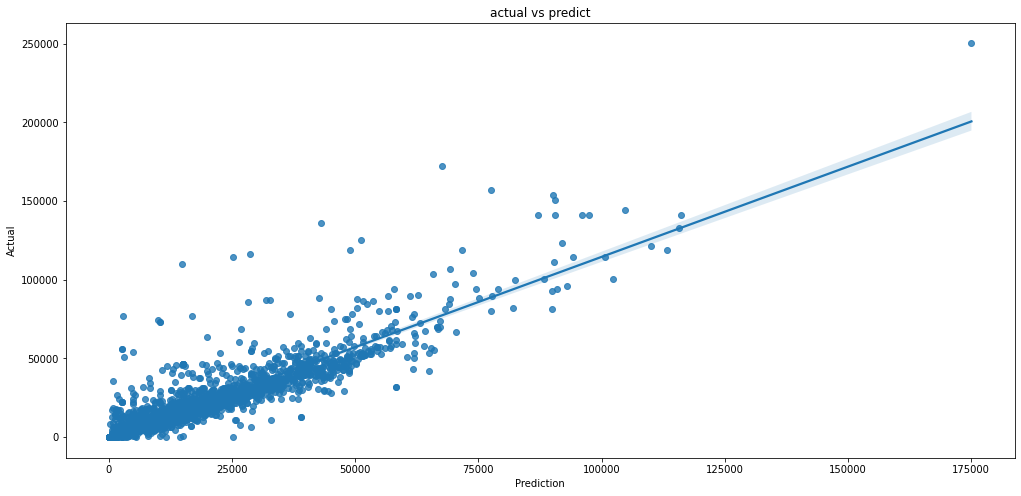

In [ ]:
plt.figure(figsize=(17, 8)) 

sns.regplot(x = np.exp(pred), y = np.exp(y_val)) 
plt.ylabel("Actual")
plt.xlabel("Prediction") 
plt.title("actual vs predict")

Blending test

In [ ]:
y_true

[array([ 9879.44738321, 18022.90260365,  7378.13589375, ...,
        20442.77774066, 33479.9362047 ,  4315.21856123]),
 array([10384.2846029 , 17524.1940571 ,  7525.46647396, ...,
        22114.70648997, 39053.23803791,  3731.47127227]),
 array([14758.72531656, 17517.84052316,  7851.43662754, ...,
        23423.71492038, 42999.56300955,  4466.10112343]),
 array([10546.13573157, 16724.02626199,  8000.86094062, ...,
        28616.72254935, 42815.43337861,  3994.67147947]),
 array([11816.5409381 , 16867.55980361,  5893.38951524, ...,
        24587.31792188, 45775.721177  ,  4584.06050184]),
 array([11581.71624102, 16670.60095987,  6055.82793288, ...,
        19655.89861383, 41595.90422523,  4074.68507459]),
 array([12674.97556758, 16893.80841608,  8541.97007744, ...,
        29476.59744324, 42476.0906557 ,  1806.27976651])]

In [ ]:
# blending predict

blend = np.mean(np.column_stack(y_true), axis=1)

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Car price/submission.csv")

In [ ]:
sub

,Price
0,0
1,0
2,0
3,0
4,0
...,...
8240,0
8241,0
8242,0
8243,0


In [ ]:
sub.Price = blend
sub

,Price
0,11663.117969
1,17174.418946
2,7321.012494
3,3409.904247
4,5559.570490
...,...
8240,9496.968276
8241,16213.358481
8242,24045.390811
8243,41170.840956


In [ ]:

# make a submission

sub.to_csv("my_subs.csv", index=False)